In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import sys
import json

In [2]:
df = pd.read_csv('rpmPackages.csv')
fcos_pkg_list = df.to_dict('list')
fcos_pkg = df.to_dict('records')

In [3]:
query = json.load(open("parsedAndProcessed.json"))

In [4]:
def parse_nevr(s):
    EPOCH_RE = re.compile(r"^(\d+):")
    DIST = re.compile(r"[^.]+$")
    ss = s.split('-')
    while (len(ss) < 3):
        ss.append("")
    r = ss.pop()
    dist_tag = DIST.search(r).group(0)
    v = ss.pop()
    e = ""
 
    m = EPOCH_RE.search(v)
    if m:  # N-E:V-R
        e = m.group(1)
        v = v[len(m.group(0)):]
    else:
        m = EPOCH_RE.search(ss[0])
        if m:  # E:N-V-R
            e = m.group(1)
            ss[0] = ss[0][len(m.group(0)):]
    return ("-".join(ss), dist_tag)

print(parse_nevr("fedora-repos-ostree-36-4.fc36"))

('fedora-repos-ostree', 'fc36')


In [5]:
class FreqMatch:
    def __init__(self, name, size, freq):
        self.name = name
        self.size = size
        self.freq = freq
        
    def __repr__(self):
        return '<FreqMatch Name: {} Size: {} Freq: {}>'.format(self.name, self.size, self.freq)
    
    def toDict(self):
        return {"Name" : self.name, "Size" : self.size, "Freq" : self.freq}

matches = []
for i, pkg in enumerate(fcos_pkg_list['Package']):
    name, dist = parse_nevr(pkg)
    nameDist = name + "." + dist
    if nameDist in query.keys():
        matches.append(FreqMatch(nameDist, fcos_pkg_list['Size'][i], len(query[nameDist])))


    


In [ ]:
matches.sort(key=lambda x: x.freq, reverse=True)
json_freq_match = []
for pkg in matches:
    json_freq_match.append(pkg.toDict())
print("By Freq")
sys.stdout=open("ByFreq.json", "w")
print(json.dumps(json_freq_match))
sys.stdout.close()
name_freq = []
freq_freq = []
for pkg in matches:
    name_freq.append(pkg.name)
    freq_freq.append(pkg.freq)

By Freq


In [ ]:
matches.sort(key=lambda x: x.size, reverse=True)
print("By Size")
sys.stdout=open("BySize.json", "w")
print(json.dumps(matches))
sys.stdout.close()
name_size = []
size_size = []
for pkg in matches:
    name_size.append(pkg.name)
    size_size.append(pkg.size)


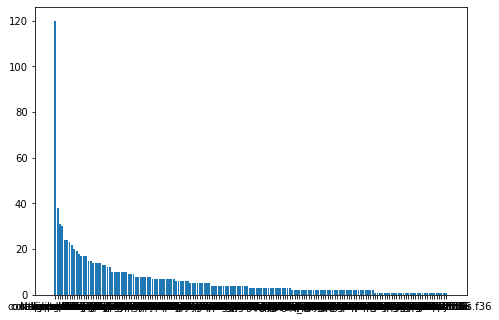

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name_freq,freq_freq)
plt.show()

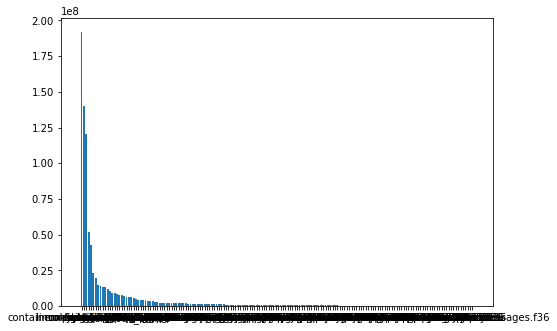

In [129]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name_size,size_size)
plt.show()